<a href="https://colab.research.google.com/github/EZZRITOE/KNN-and-Naive-Bayes-algorithms/blob/main/EZRA_MAGETO_WK_9_IP_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION
Implement KNN on the given dataset

#Importing the libraries
##Reading the data

In [208]:
# Import Libraries

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings('ignore')

In [209]:
train=pd.read_csv('/content/train .csv')
test=pd.read_csv('/content/test (1).csv')

In [210]:
#previewing the top of both datasets
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [212]:
#previewing the bottom of both datasets
train.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [213]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


##Exploring the dataset

In [214]:
#checking for null values
print(train.isna().sum())
print('----------------------------------')
print(test.isna().sum())

#the age variable and cabin variable  has significant missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [215]:
#checking for duplicates
print(train.duplicated().any())
print('-------------------------------')
print(test.duplicated().any())
#there are no duplicates in the dataset

False
-------------------------------
False


In [216]:
#checking for columns
print(train.columns)
print('------------------------')
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
------------------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [217]:
#checking the shape
print(train.shape)
print('---------------------')
print(test.shape)

(891, 12)
---------------------
(418, 11)


In [218]:
#filling the missing values
train['Age'].fillna((train['Age'].mean()), inplace=True)
test['Age'].fillna((test['Age'].mean()), inplace=True)


In [219]:
#dropping unnecessary columns
tarin=train.drop('PassengerId',1)

#Univariate Analysis

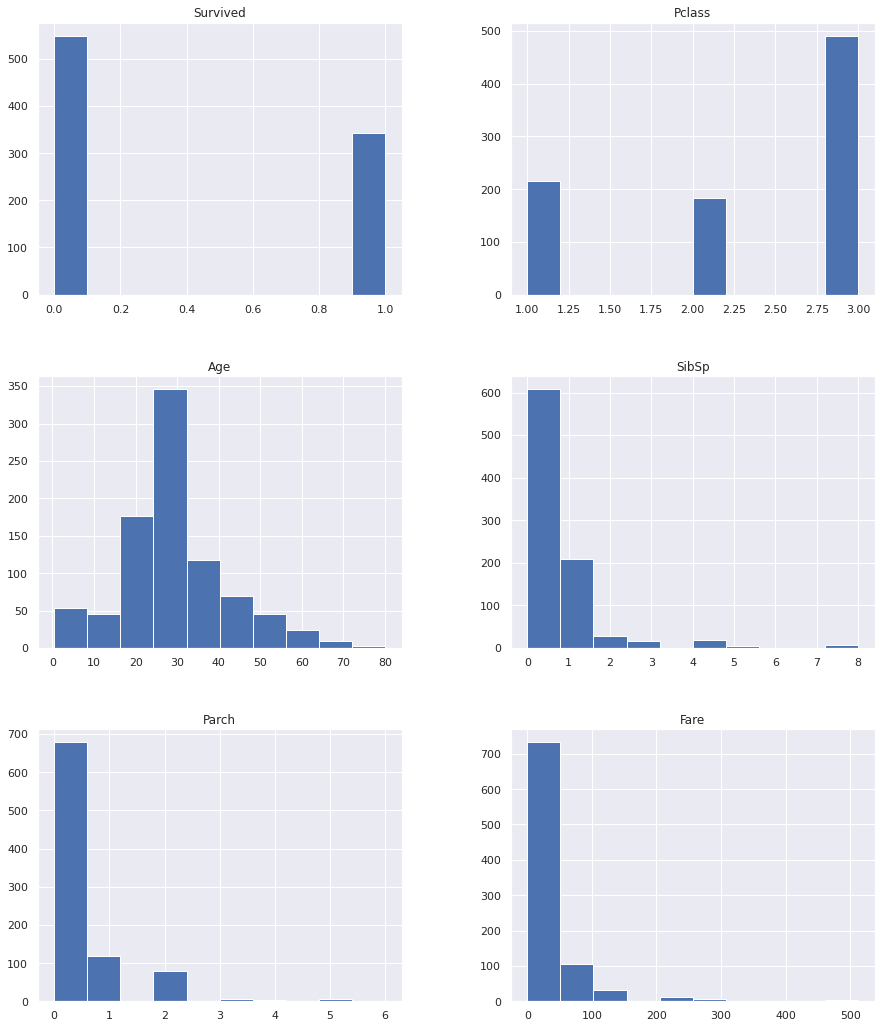

In [220]:
#plotting a histogram to show distributions of the various variables
tarin.hist(figsize=(15,18))
plt.show()

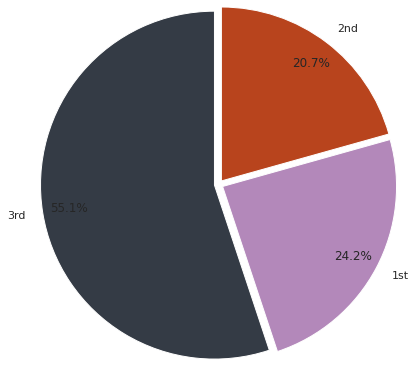

In [221]:
# Checking the proportion of travellers in for the passenger class aboard

class_pie = tarin['Pclass'].value_counts()

labels = ['3rd', '1st', '2nd']
colors = ['#343B45', '#B388BA', '#B8441D']
explode = [0.05, 0.05, 0.05]

# Creating the pie chart
plt.pie(class_pie,labels = labels, colors=colors, startangle=90, autopct='%1.1f%%', 
        pctdistance=0.85,center = (0.5,0.5),  explode = explode, radius = 2)

plt.show()
#The third class has the majority of people followed by the first class

##Bivariate Analysis

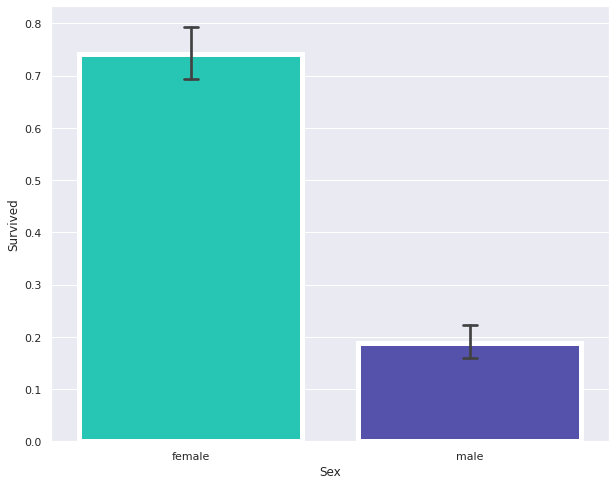

In [222]:
#Comparing the survival count between the male and female
import seaborn as sns
pal = {'male':"#4743BA", 'female':"#0DE0C8"}
sns.set(style="darkgrid")
plt.subplots(figsize = (10,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=tarin, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05)
#More female survived compared to male

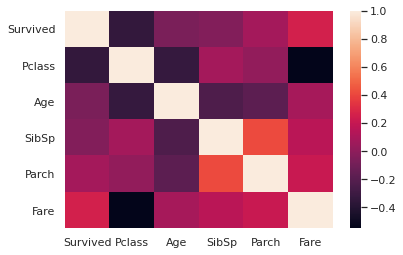

In [223]:
#correlation of the different numerical variables
sns.heatmap(tarin.corr())
#fare and pclass are negatively correlated

In [224]:
#feature engineering
# add family column
tarin['family'] = tarin['Parch'] + tarin['SibSp']

In [225]:
#drop unneccessary columns
tarin.drop(columns = ['Name', 'Ticket', 'SibSp', 'Parch','Cabin'],axis= 1 ,inplace=True)
tarin.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [226]:
#Replacing words with numericals
tarin.Sex.replace({'male':0, 'female':1}, inplace = True)
tarin.Embarked.replace({'S':0, 'C':1, 'Q':2}, inplace = True)
tarin.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,0,22.0,7.2500,0.0,1
1,1,1,1,38.0,71.2833,1.0,1
2,1,3,1,26.0,7.9250,0.0,0
3,1,1,1,35.0,53.1000,0.0,1
4,0,3,0,35.0,8.0500,0.0,0


In [227]:
tarin.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
family      0
dtype: int64

In [228]:
tarin['Embarked'].fillna((tarin['Embarked'].mean()), inplace=True)

#KNN
##Implementing KNN

In [229]:
# Splitting the data into the independent and dependent variables
X = tarin.drop(['Survived'], axis=1)
y = tarin.Survived

In [230]:
# Splitting the data into train and test sets using 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [231]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [232]:
# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)


In [233]:
# Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

[[87 16]
 [17 59]]
F1 Score:  0.7814569536423841


#70-30 split

In [234]:
# Splitting the data into the independent and dependent variables
X = tarin.drop(['Survived'], axis=1)
y = tarin.Survived

In [235]:
# Splitting the data into train and test sets using 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [236]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [237]:
# Fitting the KNN classifier model to the training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting the outcome
y_pred = knn.predict(X_test)


In [245]:
# Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

[[132  24]
 [ 27  85]]
F1 Score:  0.7692307692307692


#60-40 split

In [247]:
# Splitting the data into the independent and dependent variables
X = tarin.drop(['Survived'], axis=1)
y = tarin.Survived

In [248]:
# Splitting the data into train and test sets using 60-40 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [249]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [250]:
#instantiating the model
knn = KNeighborsClassifier(n_neighbors=3, p=1, leaf_size=7)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=7, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [251]:

# Predicting the outcome
y_pred = knn.predict(X_test)

In [252]:
# Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

[[176  46]
 [ 33 102]]
F1 Score:  0.7208480565371024


The 80-20 split provides a good score compared to the others